# Pandas

## Pandas
#### a package for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.
- A set of labeled array data structures, the primary of which are Series and DataFrame.
- Index objects enabling both simple axis indexing and multi-level or hierarchical axis indexing
- An integrated group by engine for aggregating and transforming datasets
- Date range generation and custom date offsets enabling the implementation of customized frequencies
- Input, output tools: Loading data from flat files such as csv, delimited, excel, and saving and loading pandas objects from the fast and efficient PyTables/HDF5 format.
- Memory-efficient "sparse" version of the standard data structures for stroing data that is mostly missing or mostly constant (some fixed value)
- Moving window statistics (rolling mean, rolling standard deviation, etc.)
- Static and moving window linear and panel regression

### Data structures

Series: 1D labeled homogeneously-typed array

DataFrame: 2D labeled, size-mutable tabular structure with potentially heterogeneously-typed columns

Panel: 3D labeled, also size-mutable array

### Object creation

Import

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Object creation

In [7]:
# Series
s = pd.Series([1, 3, 5, np.nan, 6, 8])
print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


In [8]:
# DataFrame
dates = pd.date_range("20130101", periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=["A", "B", "C", "D"])
print(df)

                   A         B         C         D
2013-01-01 -0.790078  1.039154 -0.180770  0.597620
2013-01-02  0.564263 -0.735781  0.756354 -1.007826
2013-01-03  0.789884 -0.387658  0.169210 -0.516731
2013-01-04  0.418765 -1.491648  1.351534 -0.185486
2013-01-05 -0.769765  0.167088  0.180239 -0.085155
2013-01-06  0.321757  0.192383  1.965752  1.644293


Creating DataFrame by passing a dict of objects that can be converted to series-like.

In [9]:
any_dict = {
    "A": 1.0, 
    "B": pd.Timestamp("20130102"), 
    "C": pd.Series(1, index=list(range(4)), dtype="float32"), 
    "D": np.array([3] * 4, dtype="int32"), 
    "E": pd.Categorical(["test", "train", "test", "train"]), 
    "F": "foo"
}

df2 = pd.DataFrame(any_dict)
print(df2)

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo


In [10]:
print(df2.dtypes)

A          float64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object


### Viewing data

See the top and bottom rows of the data

In [12]:
print(df.head())

                   A         B         C         D
2013-01-01 -0.790078  1.039154 -0.180770  0.597620
2013-01-02  0.564263 -0.735781  0.756354 -1.007826
2013-01-03  0.789884 -0.387658  0.169210 -0.516731
2013-01-04  0.418765 -1.491648  1.351534 -0.185486
2013-01-05 -0.769765  0.167088  0.180239 -0.085155


In [13]:
print(df.tail(3))

                   A         B         C         D
2013-01-04  0.418765 -1.491648  1.351534 -0.185486
2013-01-05 -0.769765  0.167088  0.180239 -0.085155
2013-01-06  0.321757  0.192383  1.965752  1.644293


Display the index, columns, and the underlying numpy data.

In [14]:
print(df.index)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


In [15]:
print(df.columns)

Index(['A', 'B', 'C', 'D'], dtype='object')


In [18]:
print(df.to_numpy())
# same: print(df.values)

[[-0.79007785  1.03915373 -0.18077045  0.59761984]
 [ 0.56426262 -0.73578143  0.75635447 -1.00782645]
 [ 0.78988448 -0.38765758  0.16921004 -0.51673059]
 [ 0.41876471 -1.49164782  1.35153379 -0.18548608]
 [-0.76976452  0.1670883   0.18023871 -0.08515502]
 [ 0.32175663  0.19238268  1.9657524   1.64429344]]


Show a quick statistic summary of the data

In [19]:
print(df.describe())

              A         B         C         D
count  6.000000  6.000000  6.000000  6.000000
mean   0.089138 -0.202744  0.707053  0.074453
std    0.691417  0.873477  0.819408  0.932949
min   -0.790078 -1.491648 -0.180770 -1.007826
25%   -0.496884 -0.648750  0.171967 -0.433919
50%    0.370261 -0.110285  0.468297 -0.135321
75%    0.527888  0.186059  1.202739  0.426926
max    0.789884  1.039154  1.965752  1.644293


Sort by an axis or values

In [20]:
print(df.sort_index(axis=1, ascending=False))

                   D         C         B         A
2013-01-01  0.597620 -0.180770  1.039154 -0.790078
2013-01-02 -1.007826  0.756354 -0.735781  0.564263
2013-01-03 -0.516731  0.169210 -0.387658  0.789884
2013-01-04 -0.185486  1.351534 -1.491648  0.418765
2013-01-05 -0.085155  0.180239  0.167088 -0.769765
2013-01-06  1.644293  1.965752  0.192383  0.321757


In [21]:
print(df.sort_values(by="B"))
# for multiple variables in order (when same values are in column "B", sort by "C")
# print(df.sort_values(by=["B", "C"])

                   A         B         C         D
2013-01-04  0.418765 -1.491648  1.351534 -0.185486
2013-01-02  0.564263 -0.735781  0.756354 -1.007826
2013-01-03  0.789884 -0.387658  0.169210 -0.516731
2013-01-05 -0.769765  0.167088  0.180239 -0.085155
2013-01-06  0.321757  0.192383  1.965752  1.644293
2013-01-01 -0.790078  1.039154 -0.180770  0.597620


### Selection

Selecting a single column, which yields a Series, equivalent to df.A

In [23]:
print(df["A"])
# Same: print(df.A)

2013-01-01   -0.790078
2013-01-02    0.564263
2013-01-03    0.789884
2013-01-04    0.418765
2013-01-05   -0.769765
2013-01-06    0.321757
Freq: D, Name: A, dtype: float64


Selecting via [], which slices the row

In [24]:
print(df[0:3])

                   A         B         C         D
2013-01-01 -0.790078  1.039154 -0.180770  0.597620
2013-01-02  0.564263 -0.735781  0.756354 -1.007826
2013-01-03  0.789884 -0.387658  0.169210 -0.516731


Getting a cross section using a label

In [25]:
print(df.loc[dates[0]])

A   -0.790078
B    1.039154
C   -0.180770
D    0.597620
Name: 2013-01-01 00:00:00, dtype: float64


Selecting on a multi-axis by label

In [26]:
print(df.loc["20130102":"20130104", ["A", "B"]])

                   A         B
2013-01-02  0.564263 -0.735781
2013-01-03  0.789884 -0.387658
2013-01-04  0.418765 -1.491648


Getting a scalar value

In [27]:
print(df.iloc[3])

A    0.418765
B   -1.491648
C    1.351534
D   -0.185486
Name: 2013-01-04 00:00:00, dtype: float64


By integer slices, acting similar to numpy/python

In [28]:
print(df.iloc[3:5, 0:2])

                   A         B
2013-01-04  0.418765 -1.491648
2013-01-05 -0.769765  0.167088


By lists of integer position locations, similar to numpy/python style

In [29]:
print(df.iloc[[1, 2, 4], [0, 2]])

                   A         C
2013-01-02  0.564263  0.756354
2013-01-03  0.789884  0.169210
2013-01-05 -0.769765  0.180239


For slicing rows explicitly or columns explicitly

In [30]:
print(df.iloc[1:3, :])

                   A         B         C         D
2013-01-02  0.564263 -0.735781  0.756354 -1.007826
2013-01-03  0.789884 -0.387658  0.169210 -0.516731


In [31]:
print(df.iloc[:, 1:3])

                   B         C
2013-01-01  1.039154 -0.180770
2013-01-02 -0.735781  0.756354
2013-01-03 -0.387658  0.169210
2013-01-04 -1.491648  1.351534
2013-01-05  0.167088  0.180239
2013-01-06  0.192383  1.965752


Using a single column's value to select data

In [32]:
print(df[df.A > 0])
# same: print(df[df["A"] > 0])

                   A         B         C         D
2013-01-02  0.564263 -0.735781  0.756354 -1.007826
2013-01-03  0.789884 -0.387658  0.169210 -0.516731
2013-01-04  0.418765 -1.491648  1.351534 -0.185486
2013-01-06  0.321757  0.192383  1.965752  1.644293


"where" operation for getting

In [33]:
print(df[df > 0])

                   A         B         C         D
2013-01-01       NaN  1.039154       NaN  0.597620
2013-01-02  0.564263       NaN  0.756354       NaN
2013-01-03  0.789884       NaN  0.169210       NaN
2013-01-04  0.418765       NaN  1.351534       NaN
2013-01-05       NaN  0.167088  0.180239       NaN
2013-01-06  0.321757  0.192383  1.965752  1.644293


### Setting

Setting a new column automatically aligns the data by the indexes

In [34]:
s1 = pd.Series(
    [1, 2, 3, 4, 5, 6], 
    index=pd.date_range("20130102", periods=6)
)
df["F"] = s1
print(df)

                   A         B         C         D    F
2013-01-01 -0.790078  1.039154 -0.180770  0.597620  NaN
2013-01-02  0.564263 -0.735781  0.756354 -1.007826  1.0
2013-01-03  0.789884 -0.387658  0.169210 -0.516731  2.0
2013-01-04  0.418765 -1.491648  1.351534 -0.185486  3.0
2013-01-05 -0.769765  0.167088  0.180239 -0.085155  4.0
2013-01-06  0.321757  0.192383  1.965752  1.644293  5.0


Setting values by label

In [36]:
df.at[dates[0], "A"] = 0
print(df)

                   A         B         C         D    F
2013-01-01  0.000000  1.039154 -0.180770  0.597620  NaN
2013-01-02  0.564263 -0.735781  0.756354 -1.007826  1.0
2013-01-03  0.789884 -0.387658  0.169210 -0.516731  2.0
2013-01-04  0.418765 -1.491648  1.351534 -0.185486  3.0
2013-01-05 -0.769765  0.167088  0.180239 -0.085155  4.0
2013-01-06  0.321757  0.192383  1.965752  1.644293  5.0


Setting values by position

In [39]:
df.iat[0, 1] = 0
print(df)

                   A         B         C         D    F
2013-01-01  0.000000  0.000000 -0.180770  0.597620  NaN
2013-01-02  0.564263 -0.735781  0.756354 -1.007826  1.0
2013-01-03  0.789884 -0.387658  0.169210 -0.516731  2.0
2013-01-04  0.418765 -1.491648  1.351534 -0.185486  3.0
2013-01-05 -0.769765  0.167088  0.180239 -0.085155  4.0
2013-01-06  0.321757  0.192383  1.965752  1.644293  5.0


Setting by assigning with a numpy array

In [40]:
df.loc[:, "D"] = np.array([5] * len(df))
print(df)

                   A         B         C    D    F
2013-01-01  0.000000  0.000000 -0.180770  5.0  NaN
2013-01-02  0.564263 -0.735781  0.756354  5.0  1.0
2013-01-03  0.789884 -0.387658  0.169210  5.0  2.0
2013-01-04  0.418765 -1.491648  1.351534  5.0  3.0
2013-01-05 -0.769765  0.167088  0.180239  5.0  4.0
2013-01-06  0.321757  0.192383  1.965752  5.0  5.0


"where" operation with setting

In [42]:
df3 = df.copy()
df3[df3 > 0] = -df3
print(df3)

                   A         B         C    D    F
2013-01-01  0.000000  0.000000 -0.180770 -5.0  NaN
2013-01-02 -0.564263 -0.735781 -0.756354 -5.0 -1.0
2013-01-03 -0.789884 -0.387658 -0.169210 -5.0 -2.0
2013-01-04 -0.418765 -1.491648 -1.351534 -5.0 -3.0
2013-01-05 -0.769765 -0.167088 -0.180239 -5.0 -4.0
2013-01-06 -0.321757 -0.192383 -1.965752 -5.0 -5.0


### Missing data

pandas primarily uses the value np.nan to represent missing data.

To drop any rows that have missing data

In [44]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0]:dates[1], "E"] = 1

new_df1  = df1.dropna(how="any")

print("df1")
print(df1)
print()
print("new_df1")
print(new_df1)

df1
                   A         B         C    D    F    E
2013-01-01  0.000000  0.000000 -0.180770  5.0  NaN  1.0
2013-01-02  0.564263 -0.735781  0.756354  5.0  1.0  1.0
2013-01-03  0.789884 -0.387658  0.169210  5.0  2.0  NaN
2013-01-04  0.418765 -1.491648  1.351534  5.0  3.0  NaN

new_df1
                   A         B         C    D    F    E
2013-01-02  0.564263 -0.735781  0.756354  5.0  1.0  1.0


Filling missing data

In [45]:
new_df1 = df1.fillna(value=5)
print(new_df1)

                   A         B         C    D    F    E
2013-01-01  0.000000  0.000000 -0.180770  5.0  5.0  1.0
2013-01-02  0.564263 -0.735781  0.756354  5.0  1.0  1.0
2013-01-03  0.789884 -0.387658  0.169210  5.0  2.0  5.0
2013-01-04  0.418765 -1.491648  1.351534  5.0  3.0  5.0


### Operation

Perform a descriptive statistic

In [46]:
print(df.mean())

A    0.220817
B   -0.375936
C    0.707053
D    5.000000
F    3.000000
dtype: float64


In [47]:
print(df.mean(axis=1))

2013-01-01    1.204807
2013-01-02    1.316967
2013-01-03    1.514287
2013-01-04    1.655730
2013-01-05    1.715512
2013-01-06    2.495978
Freq: D, dtype: float64


In [48]:
print(df.max())

A    0.789884
B    0.192383
C    1.965752
D    5.000000
F    5.000000
dtype: float64


In [49]:
print(df.max(axis=1))

2013-01-01    5.0
2013-01-02    5.0
2013-01-03    5.0
2013-01-04    5.0
2013-01-05    5.0
2013-01-06    5.0
Freq: D, dtype: float64


In [50]:
print(df.min())

A   -0.769765
B   -1.491648
C   -0.180770
D    5.000000
F    1.000000
dtype: float64


In [51]:
print(df.min(axis=1))

2013-01-01   -0.180770
2013-01-02   -0.735781
2013-01-03   -0.387658
2013-01-04   -1.491648
2013-01-05   -0.769765
2013-01-06    0.192383
Freq: D, dtype: float64


### Merge

Pandas provides various functions for easily combining together series, DataFrame, and Panel objects.

Concatenating pandas object together

In [53]:
df = pd.DataFrame(np.random.randn(10, 4))
pieces = [df[:3], df[3:7], df[7:]]

In [56]:
print(df[:3])
print("-"*50)
print(df[3:7])
print("-"*50)
print(df[7:])

          0         1         2         3
0  0.346551 -0.160546  0.482654 -0.406563
1 -1.712055  1.020728 -1.103037  1.678062
2  0.277474 -0.627492  0.096087  0.673711
--------------------------------------------------
          0         1         2         3
3 -0.741435 -0.938165  0.034535  0.402854
4 -0.029299 -0.386001 -1.082315  0.629105
5 -1.543002  0.291675 -0.578112 -0.457055
6 -1.289977  0.863533 -1.883539  0.263916
--------------------------------------------------
          0         1         2         3
7 -0.402007  1.615061 -2.391986 -0.622976
8  0.306863 -0.342033 -0.784357 -1.639840
9  0.619430 -0.189661 -0.243625 -1.351618


In [54]:
print(pd.concat(pieces))

          0         1         2         3
0  0.346551 -0.160546  0.482654 -0.406563
1 -1.712055  1.020728 -1.103037  1.678062
2  0.277474 -0.627492  0.096087  0.673711
3 -0.741435 -0.938165  0.034535  0.402854
4 -0.029299 -0.386001 -1.082315  0.629105
5 -1.543002  0.291675 -0.578112 -0.457055
6 -1.289977  0.863533 -1.883539  0.263916
7 -0.402007  1.615061 -2.391986 -0.622976
8  0.306863 -0.342033 -0.784357 -1.639840
9  0.619430 -0.189661 -0.243625 -1.351618


SQL style merges

Use "?" to see a detailed documentation for functions.

In [57]:
?pd.merge

Signature:
pd.merge(
    left: 'DataFrame | Series',
    right: 'DataFrame | Series',
    how: 'MergeHow' = 'inner',
    on: 'IndexLabel | AnyArrayLike | None' = None,
    left_on: 'IndexLabel | AnyArrayLike | None' = None,
    right_on: 'IndexLabel | AnyArrayLike | None' = None,
    left_index: 'bool' = False,
    right_index: 'bool' = False,
    sort: 'bool' = False,
    suffixes: 'Suffixes' = ('_x', '_y'),
    copy: 'bool | None' = None,
    indicator: 'str | bool' = False,
    validate: 'str | None' = None,
) -> 'DataFrame'
Docstring:
Merge DataFrame or named Series objects with a database-style join.

A named Series object is treated as a DataFrame with a single named column.

The join is done on columns or indexes. If joining columns on
columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
on indexes or indexes on a column or columns, the index will be passed on.
When performing a cross merge, no column specifications to merge on are
allowed.

.. warning:

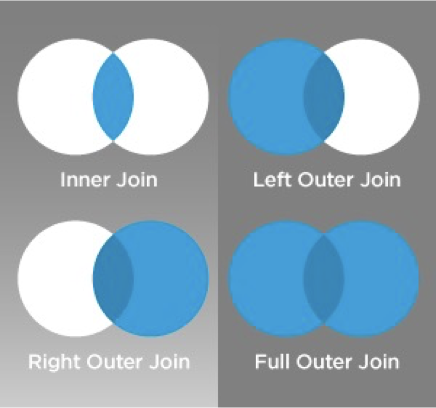

One unique key combination

In [58]:
left = pd.DataFrame({
    "key": ["K0", "K1", "K2", "K3"], 
    "A": ["A0", "A1", "A2", "A3"], 
    "B": ["B0", "B1", "B2", "B3"]
})
print("left:")
print(left)
print("-"*50)

right = pd.DataFrame({
    "key": ["K0", "K1", "K2", "K3"], 
    "C": ["C0", "C1", "C2", "C3"], 
    "D": ["D0", "D1", "D2", "D3"]
})
print("right:")
print(right)
print("-"*50)

result = pd.merge(left, right, on="key")
print(result)

left:
  key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2
3  K3  A3  B3
--------------------------------------------------
right:
  key   C   D
0  K0  C0  D0
1  K1  C1  D1
2  K2  C2  D2
3  K3  C3  D3
--------------------------------------------------
  key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K1  A1  B1  C1  D1
2  K2  A2  B2  C2  D2
3  K3  A3  B3  C3  D3


Multiple join keys

In [59]:
left = pd.DataFrame({
    "key1": ["K0", "K1", "K2", "K3"], 
    "key2": ["K0", "K1", "K0", "K1"], 
    "A": ["A0", "A1", "A2", "A3"], 
    "B": ["B0", "B1", "B2", "B3"]
})
print("left:")
print(left)
print("-"*50)

right = pd.DataFrame({
    "key1": ["K0", "K1", "K1", "K2"], 
    "key2": ["K0", "K0", "K0", "K0"], 
    "C": ["C0", "C1", "C2", "C3"], 
    "D": ["D0", "D1", "D2", "D3"]
})
print("right:")
print(right)
print("-"*50)

result = pd.merge(left, right, on=["key1", "key2"])
print(result)

left:
  key1 key2   A   B
0   K0   K0  A0  B0
1   K1   K1  A1  B1
2   K2   K0  A2  B2
3   K3   K1  A3  B3
--------------------------------------------------
right:
  key1 key2   C   D
0   K0   K0  C0  D0
1   K1   K0  C1  D1
2   K1   K0  C2  D2
3   K2   K0  C3  D3
--------------------------------------------------
  key1 key2   A   B   C   D
0   K0   K0  A0  B0  C0  D0
1   K2   K0  A2  B2  C3  D3


For more information,

http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-join

### Grouping

"Group by": we are referring to a process involving one or more of the following steps.
- Splitting the data into groups based on some criteria
- Applying a function to each group independently
- Combining the results into a data structure

Group by either the A or B columns or both

In [61]:
df = pd.DataFrame({
    "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"], 
    "B": ["one", "one", "two", "three", "two", "two", "one", "three"], 
    "C": np.random.randn(8), 
    "D": np.random.randn(8)
})
print(df)
print("-"*50)

print(df.groupby(by="A").sum())
print("-"*50)

print(df.groupby(by=["A", "B"]).sum())


     A      B         C         D
0  foo    one  0.484218  0.179179
1  bar    one -0.298744  2.486370
2  foo    two  0.313009 -0.151237
3  bar  three -0.040220  0.680299
4  foo    two -1.767737  0.622012
5  bar    two  0.834434  1.619646
6  foo    one -2.297367 -1.522442
7  foo  three -0.184801  0.770597
--------------------------------------------------
                     B         C         D
A                                         
bar        onethreetwo  0.495470  4.786314
foo  onetwotwoonethree -3.452679 -0.101891
--------------------------------------------------
                  C         D
A   B                        
bar one   -0.298744  2.486370
    three -0.040220  0.680299
    two    0.834434  1.619646
foo one   -1.813150 -1.343264
    three -0.184801  0.770597
    two   -1.454728  0.470775


For more information,

http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby

### Getting data in and out

Reading from a csv file and writing to a csv file.

In [63]:
df.to_csv("foo.csv", index=True, header=True)

In [64]:
df_read = pd.read_csv("foo.csv")
print(df_read)

   Unnamed: 0    A      B         C         D
0           0  foo    one  0.484218  0.179179
1           1  bar    one -0.298744  2.486370
2           2  foo    two  0.313009 -0.151237
3           3  bar  three -0.040220  0.680299
4           4  foo    two -1.767737  0.622012
5           5  bar    two  0.834434  1.619646
6           6  foo    one -2.297367 -1.522442
7           7  foo  three -0.184801  0.770597


In [66]:
df_read = pd.read_csv("foo.csv", index_col=0)
print(df_read)

     A      B         C         D
0  foo    one  0.484218  0.179179
1  bar    one -0.298744  2.486370
2  foo    two  0.313009 -0.151237
3  bar  three -0.040220  0.680299
4  foo    two -1.767737  0.622012
5  bar    two  0.834434  1.619646
6  foo    one -2.297367 -1.522442
7  foo  three -0.184801  0.770597


In [68]:
df_read = pd.read_csv("foo.csv", header=None)
print(df_read)

     0    1      2                     3                     4
0  NaN    A      B                     C                     D
1  0.0  foo    one   0.48421767018347783   0.17917854651702758
2  1.0  bar    one   -0.2987442612418438      2.48637002592288
3  2.0  foo    two    0.3130089935265729  -0.15123702222705068
4  3.0  bar  three  -0.04021991331056435    0.6802986816521585
5  4.0  foo    two   -1.7677373334966384     0.622012363641882
6  5.0  bar    two    0.8344344351536046     1.619645771611292
7  6.0  foo    one    -2.297367333819536   -1.5224423080675091
8  7.0  foo  three  -0.18480103546643714    0.7705973601593938


Reading from a excel file and writing to a excel file

In [71]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 4.3 MB/s eta 0:00:00a 0:00:01


In [72]:
df.to_excel("foo.xlsx", sheet_name="Foo")

In [74]:
df_excel_read = pd.read_excel("foo.xlsx", "Foo", index_col=None)
print(df_excel_read)

   Unnamed: 0    A      B         C         D
0           0  foo    one  0.484218  0.179179
1           1  bar    one -0.298744  2.486370
2           2  foo    two  0.313009 -0.151237
3           3  bar  three -0.040220  0.680299
4           4  foo    two -1.767737  0.622012
5           5  bar    two  0.834434  1.619646
6           6  foo    one -2.297367 -1.522442
7           7  foo  three -0.184801  0.770597


### Getting started (reading material)

https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html